# Time Series Pandas Exercises

## Imports

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
print('youre good')

youre good


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#import the dataset
from vega_datasets import data
df = data.sf_temps()

In [3]:
#check out the first 5 rows
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
#look at the format of the date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
#set index to the date to resample
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [6]:
#look at the start and end of our data
df.index.min(), df.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

In [7]:
#Resample by day and average temp
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

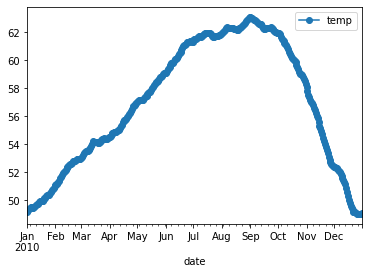

In [13]:
#Viz avg temp over time
df.resample('D').mean().plot(marker='o')


### 2. Write the code necessary to visualize the minimum temperature over time

<AxesSubplot:xlabel='date'>

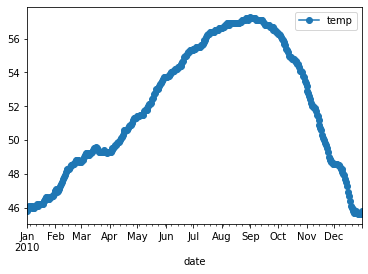

In [14]:
#Viz avg temp over time
df.resample('D').min().plot(marker='o')

### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

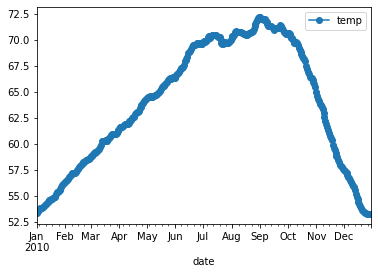

In [15]:
#Viz avg temp over time
df.resample('D').max().plot(marker='o')

### 4. Which month is the coldest, on average?


In [32]:
# January
df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### 5. Which month has the highest average temperature?

In [28]:
#September
df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

### 1. Which year and month combination has the highest amount of precipitation?

In [ ]:
from vega_datasets import data
data.seattle_weather()

### 2. Visualize the amount of monthly precipitation over time.?

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

### 4. Which year-month combination is the windiest?

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

### 6. In which month does it rain the most?


### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
from vega_datasets import data
data.flights_20k()

### 1. Convert any negative delays to 0.

### 2. Which hour of the day has the highest average delay?

### 3. Does the day of the week make a difference in the delay amount?


### 4. Does the month make a difference in the delay amount?


### B O N U S

In [ ]:
from vega_datasets import data
data.iowa_electricity()

### 1. For each row, calculate the percentage of the year's total that energy source provided.

### 2. Lineplot of generation over time, color by source

### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


### 5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total